In [1]:
#basic Libraries

In [3]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#Libraries for preocessing text

In [6]:
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [9]:
#pip installs

In [10]:
!pip install openpyxl
!pip install webcolors

In [11]:
import pandas as pd

df = pd.read_excel (r'C:\Users\Aalag\Downloads\orders_data.xlsx')

In [12]:
df.head()

,order_no,order_date,buyer,ship_city,ship_state,sku,description,quantity,item_total,shipping_fee,cod,order_status
0,405-9763961-5211537,"Sun, 18 Jul, 2021, 10:38 pm IST",Mr.,"CHANDIGARH,",CHANDIGARH,SKU: 2X-3C0F-KNJE,100% Leather Elephant Shaped Piggy Coin Bank |...,1,₹449.00,NaN,NaN,Delivered to buyer
1,404-3964908-7850720,"Tue, 19 Oct, 2021, 6:05 pm IST",Minam,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
2,171-8103182-4289117,"Sun, 28 Nov, 2021, 10:20 pm IST",yatipertin,"PASIGHAT,",ARUNACHAL PRADESH,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,1,₹449.00,₹60.18,NaN,Delivered to buyer
3,405-3171677-9557154,"Wed, 28 Jul, 2021, 4:06 am IST",aciya,"DEVARAKONDA,",TELANGANA,SKU: AH-J3AO-R7DN,Pure 100% Leather Block Print Rectangular Jewe...,1,NaN,NaN,Cash On Delivery,Delivered to buyer
4,402-8910771-1215552,"Tue, 28 Sept, 2021, 2:50 pm IST",Susmita,"MUMBAI,",MAHARASHTRA,SKU: KL-7WAA-Z82I,Pure Leather Sling Bag with Multiple Pockets a...,1,"₹1,099.00",₹84.96,NaN,Delivered to buyer


In [13]:
#understanding the dataset

In [14]:
df.shape

(171, 12)

In [15]:
df.dtypes

order_no        object
order_date      object
buyer           object
ship_city       object
ship_state      object
sku             object
description     object
quantity         int64
item_total      object
shipping_fee    object
cod             object
order_status    object
dtype: object

In [16]:
#looking at the datatypes we can see that:
#order_date can be coverted to date time
#item_total and shipping fee are object data type, should be coverted to numeric 

In [17]:
#checking missing values

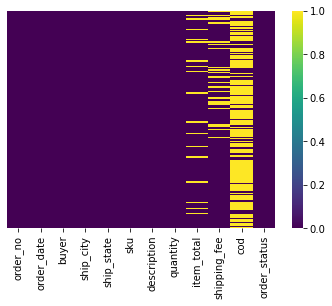

In [18]:
sns.heatmap(df.isnull(), cmap = 'viridis')

plt.yticks([])

plt.show()

In [19]:
#missing value percentage

In [20]:
df.isnull().sum()/len(df)*100

order_no         0.000000
order_date       0.000000
buyer            0.000000
ship_city        0.000000
ship_state       0.000000
sku              0.000000
description      0.000000
quantity         0.000000
item_total      10.526316
shipping_fee    15.204678
cod             72.514620
order_status     0.000000
dtype: float64

In [21]:
#data cleaning, coverting the datatypes

In [22]:
df['item_total'] = pd.to_numeric(df['item_total'].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])

In [23]:
df['shipping_fee'] = pd.to_numeric(df['shipping_fee'].str.replace(',',"").str.extract(r'([\d]+\.[\d]+)')[0])

In [24]:
df['order_date']  = pd.to_datetime(df['order_date'].astype(str).str.replace('IST',''))

In [25]:
#checking the distribution of both columns before imputing

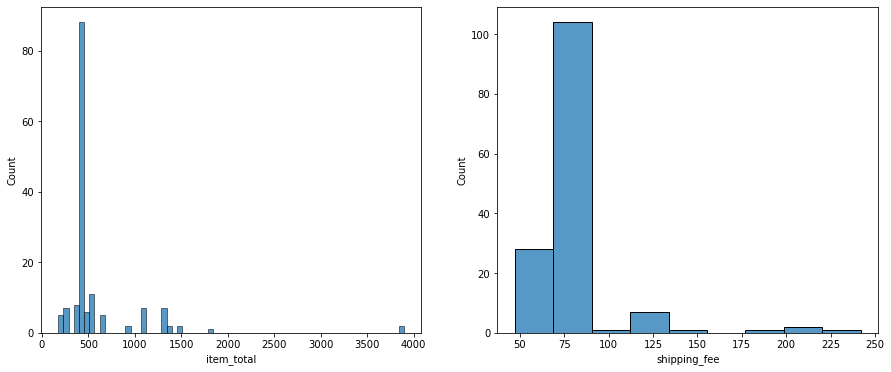

In [26]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)

sns.histplot(df['item_total'])

plt.subplot(1,2,2)

sns.histplot(df['shipping_fee'])

plt.show()

In [27]:
#distributions are right skewed so I'm using the median

In [28]:
df['item_total'].fillna(df['item_total'].median(),inplace = True)

df['shipping_fee'].fillna(df['shipping_fee'].median(),inplace = True)

In [29]:
#cash on Deliver feature, according to the data cod is Mod of payment-cash on delivery or not
#For cod we can see that there are only two unqiue values. So I will convert this into a boolean

In [30]:
df['cod'].unique()

array([nan, 'Cash On Delivery'], dtype=object)

In [31]:
df['cod'].fillna(0, inplace = True)

df['cod'].replace('Cash On Delivery',1, inplace = True)

df['cod']= pd.to_numeric(df['cod'])

In [32]:
#the state and city columns also need cleaning

In [33]:
df['ship_state'].unique()

array(['CHANDIGARH', 'ARUNACHAL PRADESH', 'TELANGANA', 'MAHARASHTRA',
       'WEST BENGAL', 'UTTAR PRADESH', 'KARNATAKA', 'CHHATTISGARH',
       'HARYANA', 'TRIPURA', 'TAMIL NADU', 'ODISHA', 'ANDHRA PRADESH',
       'DELHI', 'GOA', 'Odisha', 'JAMMU & KASHMIR', 'GUJARAT', 'ASSAM',
       'KERALA', 'Maharashtra', 'PUNJAB', 'RAJASTHAN', 'CHANDIGARH,',
       'BIHAR', 'MADHYA Pradesh', 'MOHALI,', 'Andhra Pradesh',
       'Himachal Pradesh', 'UTTARAKHAND'], dtype=object)

In [34]:
#coverting all values to the same case and removing commas

In [35]:
df['ship_state'] = df['ship_state'].str.upper().str.replace(',',"")
df['ship_city'] = df['ship_city'].str.upper().str.replace(',',"")

In [36]:
#the data is now cleaned and ready for analysis

In [37]:
df.describe(include = np.number)

,quantity,item_total,shipping_fee,cod
count,171.000000,171.000000,171.000000,171.000000
mean,1.087719,568.766082,84.780585,0.274854
std,0.445132,463.371967,24.447241,0.447752
min,1.000000,175.000000,47.200000,0.000000
25%,1.000000,399.000000,84.960000,0.000000
50%,1.000000,449.000000,84.960000,0.000000
75%,1.000000,475.000000,84.960000,1.000000
max,4.000000,3897.000000,241.900000,1.000000


In [38]:
df.describe(include = object)

,order_no,buyer,ship_city,ship_state,sku,description,order_status
count,171,171,171,171,171,171,171
unique,171,149,74,26,54,61,2
top,405-9763961-5211537,Geetika,MUMBAI,MAHARASHTRA,SKU: DN-0WDX-VYOT,Women's Set of 5 Multicolor Pure Leather Singl...,Delivered to buyer
freq,1,3,20,32,33,33,160


In [39]:
#we can see that:
#Order number is unique for each row.
#There are buyers who have placed more than 2 orders.
#The company ships to 74 cities located across 26 states.
#There are 54 unique products that have been ordered. 
#Jewelry Boxes are the most ordered item.
#Only 11 orders are returned to the seller. 

In [43]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_day'] = df['order_date'].dt.day
df['order_quarter'] = df['order_date'].dt.quarter
df['order_week'] = df['order_date'].dt.isocalendar().week
df['order_weekday'] = df['order_date'].dt.weekday
df['order_time'] = df['order_date'].dt.time
df['order_date_extracted'] = df['order_date'].dt.date

In [ ]:
#sales Trend over the past 6 months

<AxesSubplot:xlabel='order_date'>

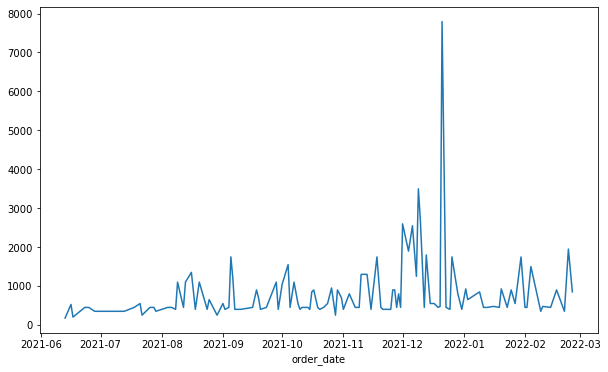

In [42]:
df.groupby(df['order_date'].dt.date)['item_total'].sum().sort_index().plot(kind = 'line' , figsize = (10,6))

In [44]:
#the plot shows the total sales for each day over the past 6 months. we can see a spike in the sales in december

In [45]:
#Sales over the past 6 months

<AxesSubplot:xlabel='order_year,order_month'>

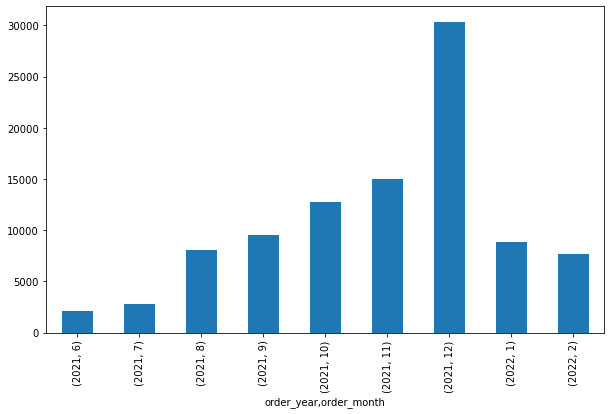

In [46]:
df.groupby([df['order_year'],df['order_month']])['item_total'].sum().sort_index().plot(kind = 'bar' , figsize = (10,6))

In [47]:
#sales in the month of December

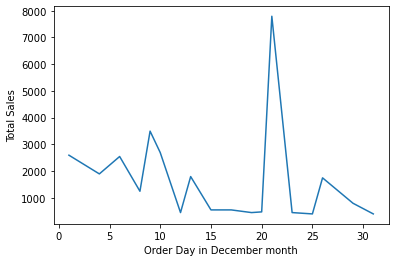

In [48]:
df[df['order_month'] == 12].groupby(df['order_day'])['item_total'].sum().plot()

plt.ylabel('Total Sales')

plt.xlabel('Order Day in December month')

plt.show()

In [49]:
#Which day of the week has maxiumum sales

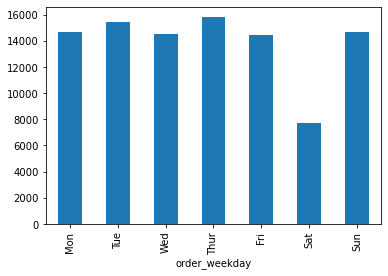

In [50]:
df.groupby(df['order_weekday'])['item_total'].sum().sort_index().plot(kind = 'bar')

days_of_week = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']

plt.xticks(ticks = list(range(0,7)),labels = days_of_week)

plt.show()

In [ ]:
#what are the top 10 cities with the highest total sales

Text(0, 0.5, 'Total Sales')

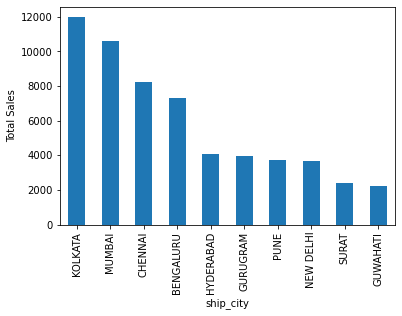

In [51]:
df.groupby(['ship_city'])['item_total'].sum().sort_values(ascending = False).iloc[:10].plot(kind = 'bar')

plt.ylabel('Total Sales')